In [45]:
import os
import pandas as pd
from datetime import datetime
import concurrent.futures
import cv2
from tqdm import tqdm
import numpy as np
from scipy.io import savemat, loadmat


In [46]:
processedDataFolder_name = "./processedData/2025-02-11_22-23-15/"
datasetFolder = "./datasets/image_data/"

In [47]:

image_data = []
for subdir, _, files in os.walk(datasetFolder):
    for file in files:
        if file.endswith(".jpg"):  
            file_path = os.path.join(subdir, file)
            renamedFile = file[:-4]
            renamedFiletimestamp = datetime.strptime(renamedFile, "%Y-%m-%d_%H_%M_%S_%f")
            renamedFileFormattedTime = renamedFiletimestamp.strftime("%Y-%m-%d %H:%M:%S.%f") + ".jpg"
            image = cv2.imread(file_path, cv2.IMREAD_COLOR)
            date_str, time_hr,time_min,time_sec, microseconds = file[:-4].split("_")
            datetime_str = f"{date_str} {time_hr}:{time_min}:{time_sec}.{microseconds}"
            timestamp = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S.%f")
            formatted_timestamp = timestamp.strftime("%Y-%m-%d %H:%M:%S.%f")
            # print(formatted_timestamp)
            image_data.append([formatted_timestamp, image, renamedFileFormattedTime, file_path])

rgbCsvDF = pd.DataFrame(image_data, columns=[ "datetime", "rgbImage","rgbFilename", "rgbFilepath"])
rgbCsvDF["datetime"] = pd.to_datetime(rgbCsvDF["datetime"], format="%Y-%m-%d %H:%M:%S.%f")
rgbCsvPath = os.path.join(processedDataFolder_name, "rgbImage.csv")
# rgbCsvDF.to_csv(rgbCsvPath, index=False)
# rgbCsvDF.to_pickle(processedDataFolder_name + "rgbImage.pkl")
print(f"pkl file saved at: {rgbCsvPath}")

pkl file saved at: ./processedData/2025-02-11_22-23-15/rgbImage.csv


In [58]:
rgbCsvDF["rgbFilename"].head(10)

289    2025-01-29 12:41:46.783143.jpg
620    2025-01-29 12:41:46.911652.jpg
312    2025-01-29 12:41:47.015956.jpg
329    2025-01-29 12:41:47.070619.jpg
97     2025-01-29 12:41:47.113871.jpg
196    2025-01-29 12:41:47.162615.jpg
566    2025-01-29 12:41:47.207420.jpg
426    2025-01-29 12:41:47.254847.jpg
39     2025-01-29 12:41:47.298247.jpg
51     2025-01-29 12:41:47.347041.jpg
Name: rgbFilename, dtype: object

In [49]:
mergedRadarDepth = processedDataFolder_name + "mergedRadarDepth.pkl" 
mergedRadarDepth = pd.read_pickle(mergedRadarDepth)
mergedRadarDepth.reset_index(drop=True, inplace=True)

In [59]:

rgbCsvDF = rgbCsvDF.sort_values(by='datetime', ascending=True)
mergedRadarDepth = mergedRadarDepth.sort_values(by='datetime', ascending=True)
    

In [70]:
print(rgbCsvDF["rgbFilename"].head(20))


289    2025-01-29 12:41:46.783143.jpg
620    2025-01-29 12:41:46.911652.jpg
312    2025-01-29 12:41:47.015956.jpg
329    2025-01-29 12:41:47.070619.jpg
97     2025-01-29 12:41:47.113871.jpg
196    2025-01-29 12:41:47.162615.jpg
566    2025-01-29 12:41:47.207420.jpg
426    2025-01-29 12:41:47.254847.jpg
39     2025-01-29 12:41:47.298247.jpg
51     2025-01-29 12:41:47.347041.jpg
555    2025-01-29 12:41:47.394090.jpg
592    2025-01-29 12:41:47.439145.jpg
428    2025-01-29 12:41:47.481968.jpg
534    2025-01-29 12:41:47.527652.jpg
470    2025-01-29 12:41:47.582974.jpg
481    2025-01-29 12:41:47.634164.jpg
591    2025-01-29 12:41:47.682620.jpg
143    2025-01-29 12:41:47.727104.jpg
290    2025-01-29 12:41:47.773651.jpg
611    2025-01-29 12:41:47.815953.jpg
Name: rgbFilename, dtype: object


In [69]:
print(mergedRadarDepthRgb["datetime"].head(20))

0    2025-01-29 12:41:45.000
1    2025-01-29 12:41:45.200
2    2025-01-29 12:41:45.400
3    2025-01-29 12:41:45.600
4    2025-01-29 12:41:45.800
5    2025-01-29 12:41:46.000
6    2025-01-29 12:41:46.200
7    2025-01-29 12:41:46.400
8    2025-01-29 12:41:46.600
9    2025-01-29 12:41:46.800
10   2025-01-29 12:41:47.000
11   2025-01-29 12:41:47.200
12   2025-01-29 12:41:47.400
13   2025-01-29 12:41:47.600
14   2025-01-29 12:41:47.800
15   2025-01-29 12:41:48.000
16   2025-01-29 12:41:48.200
17   2025-01-29 12:41:48.400
18   2025-01-29 12:41:48.600
19   2025-01-29 12:41:48.800
Name: datetime, dtype: datetime64[ns]


In [71]:
mergedRadarDepthRgb = pd.merge_asof(mergedRadarDepth, rgbCsvDF, on='datetime',tolerance=pd.Timedelta('100ms'), direction='nearest')#change ms
print("mergedRadarDepthRgb.shape: ",mergedRadarDepthRgb.shape)


mergedRadarDepthRgb.shape:  (387, 11)


In [72]:
mergedRadarDepthRgb["rgbFilename"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
382    NaN
383    NaN
384    NaN
385    NaN
386    NaN
Name: rgbFilename, Length: 387, dtype: object

In [73]:
mergedRadarDepthRgb =mergedRadarDepthRgb.dropna(subset=['rgbFilename'])
print("1000ms - mergedRadarDepthRgb after dropna.shape: ",mergedRadarDepthRgb.shape)



1000ms - mergedRadarDepthRgb after dropna.shape:  (144, 11)


In [13]:
mergedRadarDepthRgb.head()

,datetime,radarPCD,doppler,snr,range,angle,power,depthPCD,rgbImage,rgbFilename,rgbFilepath
4,2025-01-29 12:41:45.800,"[[-0.0, 0.0, 0.0], [-0.0, 0.0, 0.0], [-0.0, 0....","[0.0, 0.0, 0.0, 0.04955362, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 3.3923182, 0.0, 0.0, 0.0, 3.14...","[0.0, 0.0, 0.0, 2.190968, 0.0, 0.0, 0.0, 1.976...","[0.0, 0.0, 0.0, 1.0297443, 0.0, 0.0, 0.0, 1.01...","[0.0, 0.0, 0.0, 757214300000000.0, 0.0, 0.0, 0...","[[-1.0291497, 1.9380001, -0.74916923], [-1.025...","[[[18, 37, 12], [21, 40, 15], [20, 40, 17], [1...",2025-01-29 12:41:46.783143.jpg,./datasets/image_data/2025-01-29_12_41_45/2025...
5,2025-01-29 12:41:46.000,"[[-0.3559053, -0.15107284, -0.04955362], [-0.0...","[-0.04955362, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[2.797009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3866414, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.9722221, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[129339425000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[[-1.0291497, 1.9380001, -0.74916923], [-1.025...","[[[18, 37, 12], [21, 40, 15], [20, 40, 17], [1...",2025-01-29 12:41:46.783143.jpg,./datasets/image_data/2025-01-29_12_41_45/2025...
6,2025-01-29 12:41:46.200,"[[-1.4590099, 1.268298, 0.0], [-0.0, 0.0, 0.0]...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.730109, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.9332072, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.8552113, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[8903158000000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-1.0291497, 1.9380001, -0.74916923], [-1.025...","[[[18, 37, 12], [21, 40, 15], [20, 40, 17], [1...",2025-01-29 12:41:46.783143.jpg,./datasets/image_data/2025-01-29_12_41_45/2025...
7,2025-01-29 12:41:46.400,"[[-0.0, 0.0, 0.0], [-0.0, 0.0, 0.0], [-0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04955362...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.1134222,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0191274,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9773844,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.965976e+...","[[-1.0291497, 1.9380001, -0.74916923], [-1.025...","[[[18, 37, 12], [21, 40, 15], [20, 40, 17], [1...",2025-01-29 12:41:46.783143.jpg,./datasets/image_data/2025-01-29_12_41_45/2025...
8,2025-01-29 12:41:46.600,"[[-1.8147798, 0.8851272, 0.04955362], [-0.0, 0...","[0.04955362, 0.0, 0.0, 0.04955362, 0.0, 0.0, 0...","[2.828743, 0.0, 0.0, 2.5880485, 0.0, 0.0, 2.99...","[2.0191274, 0.0, 0.0, 0.68736255, 0.0, 0.0, 9....","[1.1170107, 0.0, 0.0, 1.7627826, 0.0, 0.0, 1.9...","[6.965976e+16, 0.0, 0.0, 649841200000000.0, 0....","[[-1.0291497, 1.9380001, -0.74916923], [-1.025...","[[[18, 37, 12], [21, 40, 15], [20, 40, 17], [1...",2025-01-29 12:41:46.783143.jpg,./datasets/image_data/2025-01-29_12_41_45/2025...


In [55]:
mergedPcdDepthRgb.to_csv(processedDataFolder_name + "mergedPcdDepthRgb.csv", index=False)
mergedPcdDepthRgb.to_pickle(processedDataFolder_name + "mergedPcdDepthRgb.pkl")
print("mergerdPcdDepthRgb.pkl Exported")

mergerdPcdDepthRgb.pkl Exported


In [36]:
mergedPcdDepthRgbPred = pd.read_pickle(processedDataFolder_name + "mergedRadarDepthRgbPred.pkl")

In [37]:
mergedPcdDepthRgbPred.columns

Index(['predPCD'], dtype='object')

In [17]:
nedFilePath = os.path.join("./datasets/telemetry_data/")
filteredNedFile = [f for f in os.listdir(nedFilePath) if os.path.isfile(os.path.join(nedFilePath, f)) and f.endswith('.csv') and not f.startswith('only_sensor')]

def load_and_process_file(filename):
    try:
        df = pd.read_csv(nedFilePath+filename)
        print(f"Processing {filename}")
        df['nedFilename'] = filename  
        return df
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return None 


In [18]:

with concurrent.futures.ProcessPoolExecutor(max_workers=5) as file_executor:
        results = list(file_executor.map(load_and_process_file, filteredNedFile))
processedNedFiles = [df for df in results if df is not None]
if processedNedFiles:
    nedDf = pd.concat(processedNedFiles, ignore_index=True)
    nedDf = nedDf[["datetime","x_m","y_m","z_m","roll_rad_s","pitch_rad_s","yaw_rad_s","nedFilename"]]
    nedDf['datetime'] = pd.to_datetime(nedDf['datetime'])
    nedDf = nedDf.dropna()
    print(nedDf.head())  
else:
    print("No files were processed successfully.")

Processing 2024-10-30_17_37_31_telemtry.csvProcessing 2024-11-05_17_14_47_telemtry.csv

Processing 2024-10-30_15_33_50_telemtry.csv
Processing 2024-11-05_17_29_23_telemtry.csv
Processing 2024-10-30_17_38_28_telemtry.csv
Processing 2025-01-29_12_35_22_telemtry.csv
Processing 2025-01-29_12_49_07_telemtry.csv
Processing 2025-01-29_13_09_10_telemtry.csv
                    datetime       x_m       y_m       z_m  roll_rad_s  \
0 2025-01-29 12:35:23.430650 -0.000095 -0.000030 -0.848082    0.000759   
1 2025-01-29 12:35:23.461294 -0.000095 -0.000051 -0.848245    0.001361   
2 2025-01-29 12:35:23.491600 -0.000097 -0.000062 -0.848318    0.000385   
3 2025-01-29 12:35:23.528851 -0.000099 -0.000081 -0.848448    0.000942   
4 2025-01-29 12:35:23.560871 -0.000101 -0.000094 -0.848530   -0.000049   

   pitch_rad_s  yaw_rad_s                       nedFilename  
0     0.000239   0.000197  2025-01-29_12_35_22_telemtry.csv  
1    -0.000255  -0.000430  2025-01-29_12_35_22_telemtry.csv  
2    -0.000264   

In [19]:

nedDf = nedDf.sort_values(by='datetime', ascending=True)
mergerdPcdDepthRgb = mergedPcdDepthRgb.sort_values(by='datetime', ascending=True)
    

In [20]:
mergedPcdDepthRgbNed = pd.merge_asof(mergedPcdDepthRgb, nedDf, on='datetime',tolerance=pd.Timedelta('1000ms'), direction='nearest')
print("mergerdPcdDepthRgbNed.shape: ",mergedPcdDepthRgbNed.shape)
mergedPcdDepthRgbNed =mergedPcdDepthRgbNed.dropna(subset=["nedFilename"])
print("1000ms - mergerdPcdDepthRgbNed after dropna.shape: ",mergedPcdDepthRgbNed.shape)

mergerdPcdDepthRgbNed.shape:  (1145, 13)
1000ms - mergerdPcdDepthRgbNed after dropna.shape:  (252, 13)


In [21]:
mergedPcdDepthRgbNed.to_csv(processedDataFolder_name + "mergedPcdDepthRgbNed.csv", index=False)
mergedPcdDepthRgbNed.to_pickle(processedDataFolder_name + "mergedPcdDepthRgbNed.pkl")
print("mergedPcdDepthRgbNed.pkl Exported")

PermissionError: [Errno 13] Permission denied: './processedData/2025-02-01_14-28-44/mergedPcdDepthRgbNed.csv'

In [ ]:
#exporting the pkl for test on slidesr
outputDirAll = processedDataFolder_name + "droneData_All/processedData/"  
txt_file_All = processedDataFolder_name + "droneData_All/datalist.txt" 

os.makedirs(outputDirAll, exist_ok=True)

with open(txt_file_All, "w") as all_out:
    for idx,row in tqdm(mergedPcdDepthRgb.iterrows(), desc="Saving All Data", total=len(mergedPcdDepthRgb)):
        # row = mergedPcdDepthRgb.iloc[idx]
        # mat_file_name = f"{idx + 1}_mmwave.mat"
        timestampStr, fTimestampStr = mergedPcdDepthRgb["rgbFilename"][idx].split(".")[:-1]
        matName = f"{timestampStr}.{fTimestampStr}"
        mat_file_name = f"{matName}_mmwave.mat"
        mat_file_path = os.path.join(outputDirAll, mat_file_name)

        savemat(mat_file_path, {
            'radarPCD': mergedPcdDepthRgb['radarPCD'][idx],
            'depthPCD': mergedPcdDepthRgb['depthPCD'][idx],
            'datetime': mergedPcdDepthRgb['datetime'][idx]
        })
        all_out.write(mat_file_path + "\n")
print(f"Exported {len(mergedPcdDepthRgb)} testing .mat files to '{outputDirAll}' and recorded in '{txt_file_All}'.")

with open(txt_file_All, "r") as f:
    mat_file_paths = [line.strip() for line in f.readlines() if line.strip().endswith(".mat")]

mat_filenames = [path.split("/")[-1] for path in mat_file_paths]
mat_filenames_array = np.array(mat_filenames)

Exported 10 testing .mat files to './processedData/2025-02-01_14-28-44/droneData_All/processedData/' and recorded in './processedData/2025-02-01_14-28-44/droneData_All/datalist.txt'.


In [ ]:
with open(txt_file_All, "r") as f:
        mat_file_paths = [line.strip() for line in f.readlines() if line.strip().endswith(".mat")]

mat_filenames = [path.split("/")[-1] for path in mat_file_paths]
mat_filenames_array = np.array(mat_filenames)

In [ ]:
mat_filenames_array

['2024-10-02 20:21:00.599691_mmwave.mat'
 '2024-10-02 20:21:20.399870_mmwave.mat'
 '2024-10-02 20:21:39.399616_mmwave.mat'
 '2024-10-02 20:21:46.999942_mmwave.mat'
 '2024-10-02 20:27:21.199901_mmwave.mat'
 '2024-10-02 20:29:59.600329_mmwave.mat'
 '2025-01-29 12:41:51.200103_mmwave.mat'
 '2025-01-29 12:41:53.199948_mmwave.mat'
 '2025-01-29 12:41:53.600438_mmwave.mat'
 '2025-01-29 12:43:06.199806_mmwave.mat']


In [ ]:
all_files = os.listdir(resultMatFolderPath)
folder_path = processedDataFolder_name + "visualization/testResultAll"

In [ ]:
all_files

['2024-10-02 20:21:20.399870_mmwave.mat', '2025-01-29 12:41:53.600438_mmwave.mat', '2024-10-02 20:21:46.999942_mmwave.mat', '2025-01-29 12:41:51.200103_mmwave.mat', '2025-01-29 12:41:53.199948_mmwave.mat', '2024-10-02 20:27:21.199901_mmwave.mat', '2024-10-02 20:21:39.399616_mmwave.mat', '2024-10-02 20:21:00.599691_mmwave.mat', '2024-10-02 20:29:59.600329_mmwave.mat', '2025-01-29 12:43:06.199806_mmwave.mat']


In [ ]:
mat_files = [file for file in all_files if file.endswith('.mat')]

In [ ]:
mat_files

['2024-10-02 20:21:20.399870_mmwave.mat', '2025-01-29 12:41:53.600438_mmwave.mat', '2024-10-02 20:21:46.999942_mmwave.mat', '2025-01-29 12:41:51.200103_mmwave.mat', '2025-01-29 12:41:53.199948_mmwave.mat', '2024-10-02 20:27:21.199901_mmwave.mat', '2024-10-02 20:21:39.399616_mmwave.mat', '2024-10-02 20:21:00.599691_mmwave.mat', '2024-10-02 20:29:59.600329_mmwave.mat', '2025-01-29 12:43:06.199806_mmwave.mat']


In [ ]:
mat_file = '2024-10-02 20:21:20.399870_mmwave.mat'

Traceback (most recent call last):
  File "/root/.vscode-server/extensions/ms-python.python-2024.22.2-linux-x64/python_files/python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
  File "<string>", line 1
    mat_file = '2024-10-02 20:21:20.399870_mmwave.mat'"
                                                      ^
SyntaxError: EOL while scanning string literal



In [ ]:
print(mat_file.split("_")[0])

2024-10-02 20:21:20.399870


In [ ]:
timestampStr = mat_file.split("_")[0]


Traceback (most recent call last):
  File "/root/.vscode-server/extensions/ms-python.python-2024.22.2-linux-x64/python_files/python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
  File "<string>", line 1, in <module>
ValueError: not enough values to unpack (expected 5, got 1)



In [ ]:
timestampStr = datetime.strptime(timestampStr, "%Y-%m-%d %H:%M:%S.%f")
rgbFileNa = timestampStr.strftime("%Y-%m-%d %H:%M:%S.%f") + ".jpg"
print(rgbFileNa)

2024-10-02 20:21:20.399870.jpg


In [ ]:
rgbFilePt = mergedPcdDepthRgb.loc[mergedPcdDepthRgb['rgbFilename'] == rgbFileNa, 'rgbFilepath'].iloc[0]


In [ ]:
rgbFilePt

./datasets/image_data/2024-10-02_20_20_33/2024-10-02_20_21_20_399870.jpg


In [ ]:
rgbFilePt = mergedPcdDepthRgb.loc[mergedPcdDepthRgb['rgbFilename'] == rgbFileNa, 'rgbFilepath']
if not rgbFilePt.empty:
    rgbFilePt = rgbFilePt.iloc[0]  # Safe access
else:
    rgbFilePt = None

In [ ]:
rgbFilePt

./datasets/image_data/2024-10-02_20_20_33/2024-10-02_20_21_20_399870.jpg


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import concurrent.futures
from utils.helper import *
# from app.utils.helper import *
import gc
import time

In [3]:
total_frameDepth = pd.DataFrame(columns=["datetime","depthPCD"])
totalDepthFrame = []
totalDepthFrameTimestamps = []

In [4]:
with open("./datasets/depth_data/drone_2025-01-29_12_41_45_test_depth.pkl", "rb") as f:
    depthObj = pickle.load(f)

In [5]:
depthObj

[[array([(-1.0291497 , -0.74916923, 1.9380001),
         (-1.0259585 , -0.74916923, 1.9380001),
         (-1.0227672 , -0.74916923, 1.9380001), ...,
         ( 0.26567972,  0.20628215, 0.513    ),
         ( 0.26652446,  0.20628215, 0.513    ),
         ( 0.26736918,  0.20628215, 0.513    )],
        dtype=[('f0', '<f4'), ('f1', '<f4'), ('f2', '<f4')]),
  '2025-01-29 12:41:46.829741'],
 [array([(-1.0227773 , -0.74453044, 1.9260001),
         (-1.0196059 , -0.74453044, 1.9260001),
         (-1.0164343 , -0.74453044, 1.9260001), ...,
         ( 0.2651618 ,  0.20588005, 0.512    ),
         ( 0.26600492,  0.20588005, 0.512    ),
         ( 0.266848  ,  0.20588005, 0.512    )],
        dtype=[('f0', '<f4'), ('f1', '<f4'), ('f2', '<f4')]),
  '2025-01-29 12:41:46.927161'],
 [array([(-1.019591  , -0.742211  , 1.9200001),
         (-1.0164294 , -0.742211  , 1.9200001),
         (-1.0132679 , -0.742211  , 1.9200001), ...,
         ( 0.26567972,  0.20628215, 0.513    ),
         ( 0.26652446,  0

In [6]:
i=10
x = depthObj[i][0]['f0']
y = depthObj[i][0]['f1']
z = depthObj[i][0]['f2']

In [7]:
print(x)
print(y)
print(z)

[-1.0259634  -1.0227822  -1.0164343  ...  0.2672334   0.2680831
  0.26893276]
[-0.74684983 -0.74684983 -0.74453044 ...  0.20748849  0.20748849
  0.20748849]
[1.932      1.932      1.9260001  ... 0.51600003 0.51600003 0.51600003]


In [8]:
frame = np.array([x, y, z])
frame

array([[-1.0259634 , -1.0227822 , -1.0164343 , ...,  0.2672334 ,
         0.2680831 ,  0.26893276],
       [-0.74684983, -0.74684983, -0.74453044, ...,  0.20748849,
         0.20748849,  0.20748849],
       [ 1.932     ,  1.932     ,  1.9260001 , ...,  0.51600003,
         0.51600003,  0.51600003]], dtype=float32)

In [9]:
frameT = np.array([x, y, z]).T
frameT

array([[-1.0259634 , -0.74684983,  1.932     ],
       [-1.0227822 , -0.74684983,  1.932     ],
       [-1.0164343 , -0.74453044,  1.9260001 ],
       ...,
       [ 0.2672334 ,  0.20748849,  0.51600003],
       [ 0.2680831 ,  0.20748849,  0.51600003],
       [ 0.26893276,  0.20748849,  0.51600003]], dtype=float32)

In [35]:
x, y, z = frame[0, :], frame[1, :], frame[2, :]

In [11]:
x, z, y = frame[0, :], frame[1, :], frame[2, :]

/tmp/ipykernel_1055439/1310843871.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap='viridus', s=1, label="Depth Point Cloud")


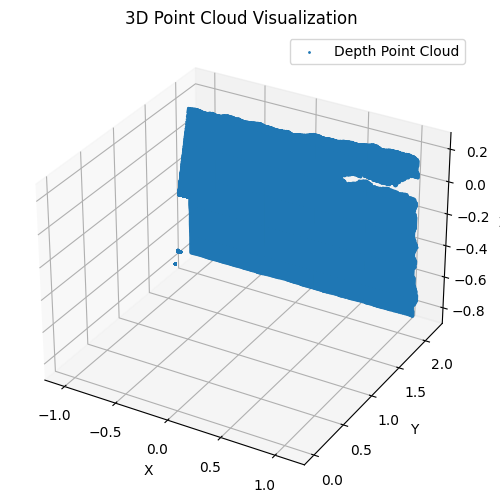

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, cmap='viridus', s=1, label="Depth Point Cloud")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Visualization')
ax.legend()
plt.savefig(f"d1.png", dpi=300, bbox_inches='tight')

plt.show()

In [39]:
x, y, z = frameT[:,0], frameT[:,1], frameT[:,2]

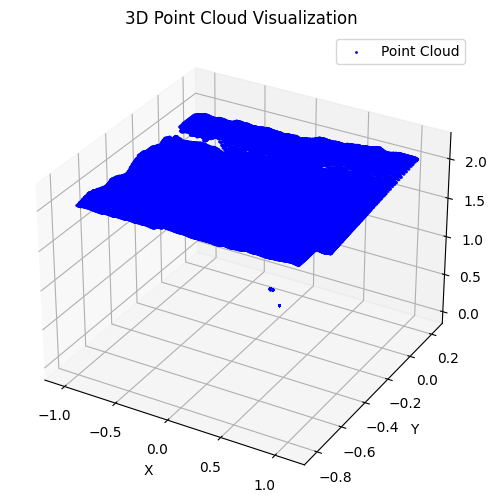

In [40]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(x, y, z, c='blue', marker='o', s=1, label="Point Cloud")

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Visualization')
ax.legend()
plt.show()

In [45]:
folderPath = processedDataFolder_name + "visualization/testResultAll/"
all_files = os.listdir(folderPath)

predImages = [file for file in all_files if file.endswith('.png') and file.startswith("2025")]


In [46]:
predImages

['2025-01-29 12:42:59.789583_mmwave.mat.png',
 '2025-01-29 12:42:26.178795_mmwave.mat.png',
 '2025-01-29 12:42:26.810417_mmwave.mat.png',
 '2025-01-29 12:41:48.410860_mmwave.mat.png',
 '2025-01-29 12:42:39.337433_mmwave.mat.png',
 '2025-01-29 12:42:12.991434_mmwave.mat.png',
 '2025-01-29 12:42:51.982066_mmwave.mat.png',
 '2025-01-29 12:42:11.809286_mmwave.mat.png',
 '2025-01-29 12:41:50.182913_mmwave.mat.png',
 '2025-01-29 12:42:27.875552_mmwave.mat.png',
 '2025-01-29 12:43:06.810315_mmwave.mat.png',
 '2025-01-29 12:42:27.197853_mmwave.mat.png',
 '2025-01-29 12:42:27.594033_mmwave.mat.png',
 '2025-01-29 12:41:48.612145_mmwave.mat.png',
 '2025-01-29 12:43:00.393387_mmwave.mat.png',
 '2025-01-29 12:42:12.790978_mmwave.mat.png',
 '2025-01-29 12:41:47.015956_mmwave.mat.png',
 '2025-01-29 12:43:12.226335_mmwave.mat.png',
 '2025-01-29 12:43:06.583838_mmwave.mat.png',
 '2025-01-29 12:43:00.791083_mmwave.mat.png',
 '2025-01-29 12:41:47.207420_mmwave.mat.png',
 '2025-01-29 12:42:27.411360_mmwav

In [26]:
import scipy.io

resultMatFolderPath = processedDataFolder_name + "outputDroneAll/"
# current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
timeDir = processedDataFolder_name.split("/")[-2]
#enable it when multiple test scenios required
# folder_path = os.path.join(resultMatFolderPath, timeDir)
folder_path = resultMatFolderPath

In [27]:
all_files = os.listdir(resultMatFolderPath)
folder_path = processedDataFolder_name + "visualization/testResultAll"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")


mat_files = [file for file in all_files if file.endswith('.mat')]
progressBar = tqdm(mat_files, desc="Plotting .mat files")
for mat_file in progressBar:
    progressBar.set_postfix(file=mat_file)
    file_path = os.path.join(resultMatFolderPath, mat_file)
    mat_data = scipy.io.loadmat(file_path)
    header = ['input', 'pred_pcd', 'gt_pcd', 'Chd', 'EMD']

    input_points = mat_data['input']
    pred_points = mat_data['pred_pcd']
    gt_points = mat_data['gt_pcd']


    fig = plt.figure(figsize=(20, 7))
    fig.suptitle(f"Point Cloud Visualization: {mat_file}", fontsize=7, fontweight='bold')  # Main title

    ax1 = fig.add_subplot(141, projection='3d')
    scatter1 = ax1.scatter(input_points[:, 0], input_points[:, 1], input_points[:, 2], 
                        c=input_points[:, 2], cmap='viridis', s=1)
    ax1.set_title("Input Point Cloud")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")

    ax2 = fig.add_subplot(142, projection='3d')
    scatter2 = ax2.scatter(pred_points[:, 0], pred_points[:, 1], pred_points[:, 2], 
                        c=pred_points[:, 2], cmap='viridis', s=1)
    ax2.set_title("Predicted Point Cloud")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    ax3 = fig.add_subplot(143, projection='3d')
    scatter3 = ax3.scatter(gt_points[:, 0], gt_points[:, 1], gt_points[:, 2], 
                        c=gt_points[:, 2], cmap='viridis', s=1)
    ax3.set_title("Ground Truth Point Cloud")
    ax3.set_xlabel("X")
    ax3.set_ylabel("Y")
    ax3.set_zlabel("Z")

    ax4 = fig.add_subplot(144)
    timestampStr = mat_file.split("_")[0]

    timestampStr = datetime.strptime(timestampStr, "%Y-%m-%d %H:%M:%S.%f")
    rgbFileNa = timestampStr.strftime("%Y-%m-%d %H:%M:%S.%f") + ".jpg"
    # print(rgbFileNa)
    rgbFilePt = mergedPcdDepthRgb.loc[mergedPcdDepthRgb['rgbFilename'] == rgbFileNa, 'rgbFilepath']
    if not rgbFilePt.empty:
        rgbFilePt = rgbFilePt.iloc[0] 
    else:
        rgbFilePt = None
    img = Image.open(rgbFilePt)

    ax4.imshow(img)  # Display the RGB image
    ax4.set_title("RGB Image")
    ax4.axis("off")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.savefig(f"{folder_path}/new/{mat_file}.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close(fig)

Folder './processedData/2025-02-11_22-23-15/visualization/testResultAll' already exists.


Plotting .mat files:   0%|          | 0/252 [00:00<?, ?it/s, file=2025-01-29 12:41:46.600000_mmwave.mat]


NameError: name 'plt' is not defined

In [28]:
from scipy.io import savemat, loadmat
import scipy.io


In [86]:
resultMatFolderPath = processedDataFolder_name + "outputDroneAll/"

In [87]:
all_files = os.listdir(resultMatFolderPath)
folder_path = processedDataFolder_name + "visualization/testResultAll"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")

Folder './processedData/2025-02-11_22-23-15/visualization/testResultAll' already exists.


In [88]:
mat_files = [file for file in all_files if file.endswith('.mat')]
progressBar = tqdm(mat_files, desc="Plotting .mat files")
predictedPcd = []

Plotting .mat files:   0%|          | 0/144 [00:00<?, ?it/s]

In [89]:
predictedPcd = []
for mat_file in progressBar:
    progressBar.set_postfix(file=mat_file)
    file_path = os.path.join(resultMatFolderPath, mat_file)
    mat_data = scipy.io.loadmat(file_path)
    header = ['input', 'pred_pcd', 'gt_pcd', 'Chd', 'EMD']

    input_points = mat_data['input']
    pred_points = mat_data['pred_pcd']
    gt_points = mat_data['gt_pcd']
    timestampStr = mat_file.split("_")[0]
    predictedPcd.append(pred_points)

    # timestampStr = datetime.strptime(timestampStr, "%Y-%m-%d %H:%M:%S.%f")
    # rgbFileNa = timestampStr.strftime("%Y-%m-%d %H:%M:%S.%f") + ".jpg"
    # print(rgbFileNa)
    
    # rgbFilePt = mergedRadarDepthRgb.loc[mergedRadarDepthRgb['rgbFilename'] == rgbFileNa, 'rgbFilepath']
    rgbFilePt = mergedRadarDepthRgb.loc[mergedRadarDepthRgb['datetime'] == timestampStr, 'rgbFilepath']
    if not rgbFilePt.empty:
        rgbFilePt = rgbFilePt.iloc[0] 
    else:
        rgbFilePt = None
    print(f"{timestampStr} {rgbFileNa} {rgbFilePt}")




Plotting .mat files:  77%|███████▋  | 111/144 [00:01<00:00, 143.33it/s, file=2025-01-29 12:41:48_mmwave.mat]     

2025-01-29 12:43:05.600000 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_43_05_584665.jpg
2025-01-29 12:41:58.400000 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_41_58_392661.jpg
2025-01-29 12:41:55.600000 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_41_55_503055.jpg
2025-01-29 12:41:58.800000 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_41_58_785856.jpg
2025-01-29 12:41:49.200000 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_41_49_108362.jpg
2025-01-29 12:41:53.400000 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_41_53_406368.jpg
2025-01-29 12:43:05.200000 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_43_05_196885.jpg
2025-01-29 12:42:40.200000 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/202

Plotting .mat files: 100%|██████████| 144/144 [00:01<00:00, 111.84it/s, file=2025-01-29 12:42:27.400000_mmwave.mat]

2025-01-29 12:43:16 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_43_15_988721.jpg
2025-01-29 12:41:49 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_41_48_992008.jpg
2025-01-29 12:43:17 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_43_16_999124.jpg
2025-01-29 12:43:17.200000 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_43_17_213918.jpg
2025-01-29 12:41:54 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_41_53_993924.jpg
2025-01-29 12:41:54.400000 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_41_54_386033.jpg
2025-01-29 12:41:50 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_41_49_981181.jpg
2025-01-29 12:41:53.800000 2025-01-29 12:41:58.400000.jpg ./datasets/image_data/2025-01-29_12_41_45/2025-01-29_12_41_5

In [42]:
mergedPcdDepthRgb = pd.read_pickle(processedDataFolder_name + "mergedRadarDepthRgb.pkl")

In [76]:
mergedPcdDepthRgb.columns

Index(['datetime', 'radarPCD', 'doppler', 'snr', 'range', 'angle', 'power',
       'depthPCD', 'rgbImage', 'rgbFilename', 'rgbFilepath'],
      dtype='object')

In [44]:
mergedPcdDepthRgb.head(5)

,datetime,radarPCD,doppler,snr,range,angle,power,depthPCD,rgbImage,rgbFilename,rgbFilepath
4,2025-01-29 12:41:45.800,"[[-0.0, 0.0, 0.0], [-0.0, 0.0, 0.0], [-0.0, 0....","[0.0, 0.0, 0.0, 0.04955362, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 3.3923182, 0.0, 0.0, 0.0, 3.14...","[0.0, 0.0, 0.0, 2.190968, 0.0, 0.0, 0.0, 1.976...","[0.0, 0.0, 0.0, 1.0297443, 0.0, 0.0, 0.0, 1.01...","[0.0, 0.0, 0.0, 757214300000000.0, 0.0, 0.0, 0...","[[-1.0291497, 1.9380001, -0.74916923], [-1.025...","[[[18, 37, 12], [21, 40, 15], [20, 40, 17], [1...",2025-01-29 12:41:46.783143.jpg,./datasets/image_data/2025-01-29_12_41_45/2025...
5,2025-01-29 12:41:46.000,"[[-0.3559053, -0.15107284, -0.04955362], [-0.0...","[-0.04955362, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[2.797009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3866414, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.9722221, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[129339425000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[[-1.0291497, 1.9380001, -0.74916923], [-1.025...","[[[18, 37, 12], [21, 40, 15], [20, 40, 17], [1...",2025-01-29 12:41:46.783143.jpg,./datasets/image_data/2025-01-29_12_41_45/2025...
6,2025-01-29 12:41:46.200,"[[-1.4590099, 1.268298, 0.0], [-0.0, 0.0, 0.0]...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.730109, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.9332072, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.8552113, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[8903158000000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-1.0291497, 1.9380001, -0.74916923], [-1.025...","[[[18, 37, 12], [21, 40, 15], [20, 40, 17], [1...",2025-01-29 12:41:46.783143.jpg,./datasets/image_data/2025-01-29_12_41_45/2025...
7,2025-01-29 12:41:46.400,"[[-0.0, 0.0, 0.0], [-0.0, 0.0, 0.0], [-0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04955362...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.1134222,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0191274,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9773844,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.965976e+...","[[-1.0291497, 1.9380001, -0.74916923], [-1.025...","[[[18, 37, 12], [21, 40, 15], [20, 40, 17], [1...",2025-01-29 12:41:46.783143.jpg,./datasets/image_data/2025-01-29_12_41_45/2025...
8,2025-01-29 12:41:46.600,"[[-1.8147798, 0.8851272, 0.04955362], [-0.0, 0...","[0.04955362, 0.0, 0.0, 0.04955362, 0.0, 0.0, 0...","[2.828743, 0.0, 0.0, 2.5880485, 0.0, 0.0, 2.99...","[2.0191274, 0.0, 0.0, 0.68736255, 0.0, 0.0, 9....","[1.1170107, 0.0, 0.0, 1.7627826, 0.0, 0.0, 1.9...","[6.965976e+16, 0.0, 0.0, 649841200000000.0, 0....","[[-1.0291497, 1.9380001, -0.74916923], [-1.025...","[[[18, 37, 12], [21, 40, 15], [20, 40, 17], [1...",2025-01-29 12:41:46.783143.jpg,./datasets/image_data/2025-01-29_12_41_45/2025...


In [75]:
predictedPcd

[array([[ 1.0062987e-03,  2.7389936e-03, -1.8735453e-03],
        [ 1.6786242e-03,  7.9523772e-04, -2.1326393e-03],
        [ 9.9170953e-05,  2.0772927e-03, -1.4649928e-03],
        ...,
        [-9.6322870e-01,  2.0786781e+00, -5.2068686e-01],
        [-3.8726768e-01,  2.0437727e+00, -4.0470886e-01],
        [-9.1316116e-01,  2.0419145e+00, -3.1439847e-01]], dtype=float32),
 array([[-2.0713266e-04,  6.4208545e-04, -2.5940686e-04],
        [ 3.4953840e-04,  7.0746616e-04, -3.5831332e-04],
        [-2.5372952e-04,  5.1154196e-04, -4.9001724e-04],
        ...,
        [-8.0770588e-01,  1.7161918e+00, -4.2242023e-01],
        [-3.2465908e-01,  1.6815387e+00, -3.2725593e-01],
        [-7.6396024e-01,  1.6811762e+00, -2.5284129e-01]], dtype=float32),
 array([[-6.3151494e-04,  2.2672676e-04,  1.2865737e-03],
        [-1.0672398e-04,  6.0927682e-04,  5.9005618e-04],
        [-8.5336156e-04,  2.1566637e-04,  5.6106597e-04],
        ...,
        [-7.9658842e-01,  1.6960931e+00, -4.1428095e-01],

In [77]:
mergedPcdDepthRgb["predPCD"] = predictedPcd

In [84]:
mergedPcdDepthRgb.columns

Index(['datetime', 'radarPCD', 'doppler', 'snr', 'range', 'angle', 'power',
       'depthPCD', 'rgbImage', 'rgbFilename', 'rgbFilepath', 'predPCD'],
      dtype='object')

In [82]:
mergedRadarDepthRgbPred = mergedRadarDepthRgb

In [83]:
mergedRadarDepthRgbPred.columns

Index(['datetime', 'radarPCD', 'doppler', 'snr', 'range', 'angle', 'power',
       'depthPCD', 'rgbImage', 'rgbFilename', 'rgbFilepath'],
      dtype='object')